In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False)

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

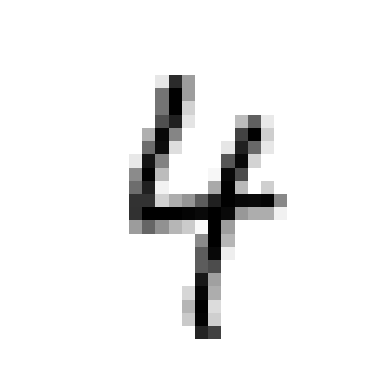

In [4]:
import matplotlib.pyplot as plt
import matplotlib

some_digit = X[26000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[26000]

'4'

In [6]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [9]:
prediction = sgd_clf.predict([some_digit])
print(prediction)

[ True]


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_4):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_4[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_4[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.97955
0.9694
0.9754


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.97955, 0.9694 , 0.9754 ])

In [12]:
from sklearn.base import BaseEstimator

class Never4Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_4_clf = Never4Classifier()
cross_val_score(never_4_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.9044, 0.9016, 0.9019])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[53188,   970],
       [  543,  5299]], dtype=int64)